Challenge_1: Aerial Cactus-AML

In [1]:
# Imports
import pandas as pd
import torch
from torchvision import datasets, transforms
from torchvision.io import read_image
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt

In [2]:
# Load data
class PlacesDataset(Dataset):
    def __init__(self,train='./data/train/train',labels='./data/train.csv',transform=None,target_transform=None):
        self.df = pd.read_csv(labels)
        self.imgPath=train
        self.transform=transform
        self.target_transform=target_transform
    def __len__(self):
        # here you just need to return a single integer number as the length of your dataset, in your 
        #  case, number of images in your train folder or lines in csv file
        return len(self.df)
    def __getitem__(self, idx):
        # this is the most important part, you need to define a code to read images from folder and
        # labels from csv files and return only a pair of (image, class). Note that here, you just 
        # need to consider 1 sample no more. Let say, you have only 1 image in your whole 
        # dataset, the method will work on batches parallely when you pass it to DataLoader class.
        img_path = os.path.join(self.imgPath, self.df.iloc[idx, 0])
        image = read_image(img_path)
        label = self.df.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Feature batch shape: torch.Size([3, 32, 32])
Labels batch shape: 1


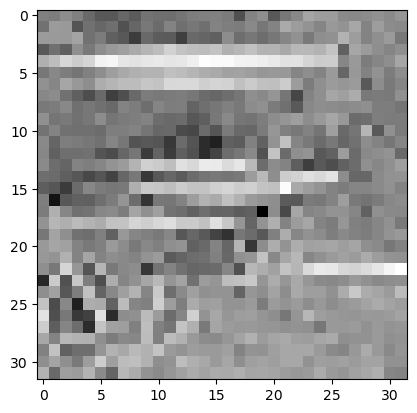

Label: 1


In [3]:
train_dataloader=PlacesDataset()
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels}")
img = train_features[0].squeeze()
label = train_labels
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")